# Sección A - Datos abiertos de la CDMX

## La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí: 

## https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import seaborn as sns

Carga de los datos

In [2]:
carpetasInv = pd.read_csv("Data/carpetas_completa_abril_2021.csv")

C:\Users\conra\.edm\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

- Entender primero los datos que se analizan. Revisar en la fuente el diccionario de datos y los antecedentes que permitan entender el contexto de la información que contiene el conjunto de datos.
- Una vez cargados los datos hay que revisar:
    - Tipos de datos: verificar que los datos se hayan cargado de manera correcta de acuerdo a los tipos de datos. Por ejemplo, verificar que campos numéricos no se hayan cargado como campos alfanuméricos.
    - Distribución de los datos: revisar el resúmen de los estadísticos de los datos para entender cómo se encuentran estos distribuidos.
- Identificar problemas potenciales con los datos: 
    - Si hay campos/registros que tienen faltantes y definir una estrategia sobre cómo se trataran estos faltantes (por ejmplo, si se eliminan los campos/registros, o bien se "rellenan" con datos interpolados, etc.)
    - Revisar si las variables categóricas son consistentes, es decir, las categorías están definidas sin errores (por ejemplo, uso de sinónimos: "No aplicable", "N/A", "no_aplic")
    - Existencia de campos que contienen información mezclada donde se necesite procesarla para separarla.
    - Eliminación de duplicados

In [3]:
carpetasInv.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [4]:
carpetasInv.tail()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1208353,2021.0,Abril,2021-04-11 15:00:00,2021,Abril,2021-04-30 23:46:49,FRAUDE,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...,AO-4,UI-2SD,DELITO DE BAJO IMPACTO,RAFAEL CHECA,NaN,CHIMALISTAC,ALVARO OBREGON,FUERO COMUN,-99.187368,19.343745,NaN
1208354,2021.0,Abril,2021-04-30 23:00:00,2021,Abril,2021-04-30 23:47:25,PERDIDA DE LA VIDA POR SUICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN BENIT...,UAT-BJ-1,1 SIN DETENIDO,HECHO NO DELICTIVO,NEBRASKA,LUSIANA,NAPOLES,BENITO JUAREZ,HECHO NO DELICTIVO,-99.175690,19.392014,NaN
1208355,2021.0,Abril,2021-04-24 15:00:00,2021,Abril,2021-04-30 23:48:51,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN BENIT...,UAT-BJ-1,1 SIN DETENIDO,DELITO DE BAJO IMPACTO,DIVISION DEL NORTE,XOLA,DEL VALLE CENTRO,BENITO JUAREZ,FUERO COMUN,-99.169775,19.398082,NaN
1208356,2021.0,Abril,2021-04-27 09:00:00,2021,Abril,2021-04-30 23:54:31,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,TABASCO,ORIZABA,ROMA NORTE,CUAUHTEMOC,FUERO COMUN,-99.160929,19.418954,NaN
1208357,2021.0,Abril,2021-04-06 12:26:00,2021,Abril,2021-04-30 23:58:49,FALSIFICACION O ALTERACION Y USO INDEBIDO DE D...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN COYOACÁN,COY-2,UI-2CD,DELITO DE BAJO IMPACTO,CALLE D,NaN,EDUCACIÓN,COYOACAN,FUERO COMUN,-99.135717,19.334169,NaN


In [5]:
carpetasInv.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [6]:
for column in carpetasInv.columns.values.tolist():
    print(column)
    print(carpetasInv[column].value_counts(dropna=False))
    print("")

ao_hechos
2018.0    253531
2019.0    242976
2017.0    227029
2020.0    198101
2016.0    194877
           ...  
1954.0         1
1952.0         1
1942.0         1
1930.0         1
1906.0         1
Name: ao_hechos, Length: 72, dtype: int64

mes_hechos
Marzo         116872
Enero         110337
Febrero       108993
Abril         102994
Octubre       102848
Agosto         98433
Noviembre      97155
Septiembre     96399
Mayo           94711
Diciembre      93870
Julio          93623
Junio          91689
NaN              434
Name: mes_hechos, dtype: int64

fecha_hechos
NaN                    434
2017-10-16 12:00:00    242
2016-01-01 12:00:00    171
2014-05-30 12:00:00    150
2016-06-01 12:00:00    143
                      ... 
2016-05-03 09:50:00      1
2010-05-04 00:00:00      1
2018-03-02 15:43:00      1
2021-01-25 15:20:00      1
2019-04-27 22:35:00      1
Name: fecha_hechos, Length: 400685, dtype: int64

ao_inicio
2018    255311
2019    250386
2017    228323
2020    204044
2016    197913

In [7]:
carpetasInv["ao_hechos"] =carpetasInv["ao_hechos"].fillna(carpetasInv["ao_inicio"])

In [8]:
carpetasInv["ao_hechos"].unique()

array([2016., 2015., 2012., 2014., 2011., 2008., 2006., 2010., 2013.,
       2005., 2009., 1955., 2004., 2002., 1998., 1997., 1965., 2007.,
       2000., 1987., 1999., 1956., 2001., 1996., 1986., 1915., 1988.,
       2017., 2003., 1991., 1993., 1977., 1984., 1995., 1994., 1990.,
       1992., 1978., 1989., 1972., 2018., 2019., 1974., 1970., 1980.,
       1976., 1983., 1985., 1966., 1969., 1981., 1960., 1982., 1975.,
       1954., 1973., 1964., 1968., 1963., 1971., 1958., 1942., 1930.,
       1979., 1906., 1962., 1957., 2020., 1950., 1952., 2021.])

In [9]:
carpetasInv["ao_hechos"] = carpetasInv["ao_hechos"].astype("int64")
carpetasInv["fecha_hechos"] = carpetasInv["fecha_hechos"].astype("datetime64")
carpetasInv["fecha_inicio"] = carpetasInv["fecha_inicio"].astype("datetime64")

In [10]:
carpetasInv.dtypes

ao_hechos                        int64
mes_hechos                      object
fecha_hechos            datetime64[ns]
ao_inicio                        int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
delito                          object
fiscalia                        object
agencia                         object
unidad_investigacion            object
categoria_delito                object
calle_hechos                    object
calle_hechos2                   object
colonia_hechos                  object
alcaldia_hechos                 object
competencia                     object
longitud                       float64
latitud                        float64
tempo                          float64
dtype: object

In [11]:
carpetasInv.describe()

,ao_hechos,ao_inicio,longitud,latitud,tempo
count,1.208358e+06,1.208358e+06,1.160094e+06,1.160094e+06,0.0
mean,2.018058e+03,2.018208e+03,-9.913726e+01,1.938740e+01,NaN
std,1.796658e+00,1.490822e+00,5.981416e-02,6.979977e-02,NaN
min,1.906000e+03,2.016000e+03,-1.002319e+02,1.909535e+01,NaN
25%,2.017000e+03,2.017000e+03,-9.917557e+01,1.933991e+01,NaN
50%,2.018000e+03,2.018000e+03,-9.914215e+01,1.938993e+01,NaN
75%,2.019000e+03,2.019000e+03,-9.909990e+01,1.943770e+01,NaN
max,2.021000e+03,2.021000e+03,-9.894686e+01,1.958333e+01,NaN


## 2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

- Hay 1,208,358 carpetas de investigación registradas (sin verificar duplicidad de carpetas de investigación). Dentro de estas carpetas de investigación, hay un campo que indica el tipo de delito ("categoría_delito") en la cual se incluye una categoría que indica carpetas relacionadas a hechos no delictivos ("HECHO NO DELICTIVO"), los cuales suman 56,177 carpetas de investigación. Por lo tanto, con un criterio más estricto, dentro del conjunto de datos habrían 1,152,181 cartpetas de investigación correspondientes a algún delito.
- Hay 341 delitos distintos registrados.
- Con respecto a la fecha de inicio de la carpeta de investigación, los rangos de años van del 2016 al 2021
- Con respecto a la fecha de los hechos, los rangos de años van de 1906 al 2021

In [12]:
print(carpetasInv["delito"].value_counts(dropna=False))

VIOLENCIA FAMILIAR                                                        122800
FRAUDE                                                                     73743
ROBO DE OBJETOS                                                            70808
ROBO A NEGOCIO SIN VIOLENCIA                                               66177
AMENAZAS                                                                   64353
                                                                           ...  
UTILIZACION INDEBIDA DE LA VIA PUBLICA                                         1
ROBO DE VEHICULO Y NOMINA CON VIOLENCIA                                        1
PROCREACION ASISTIDA                                                           1
SECUESTRO                                                                      1
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA         1
Name: delito, Length: 341, dtype: int64


In [13]:
print(carpetasInv["ao_hechos"].min())
print(carpetasInv["ao_hechos"].max())

1906
2021


In [14]:
print(carpetasInv["ao_inicio"].min())
print(carpetasInv["ao_inicio"].max())

2016
2021


## 3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

Tomando en cuenta TODAS las carpetas de investigación de la FGJ de la Ciudad de México, los 5 delitos más frecuentes en la ciudad de méxico son:
VIOLENCIA FAMILIAR, FRAUDE, ROBO DE OBJETOS, ROBO A NEGOCIO SIN VIOLENCIA y AMENAZAS. No se menciona en esta lista la categoría "HECHO NO DELICTIVO", puesto que no representa un delito. Si se quisiese tomar en cuenta, esta categoría estaría en 4to lugar. Ver la lista completa de delitos abajo.

Sin embargo, si se quisiese limitar el estudio a los delitos que se llevaron a cabo en la CDMX, habría que filtrar los datos de acuerdo a este criterio (usando el campo "alcaldia_hechos").

In [15]:
carpetasInv["delito"].value_counts().head()

VIOLENCIA FAMILIAR              122800
FRAUDE                           73743
ROBO DE OBJETOS                  70808
ROBO A NEGOCIO SIN VIOLENCIA     66177
AMENAZAS                         64353
Name: delito, dtype: int64

In [16]:

#Previamente identifiqué que la columna alcaldía estaba limpia y no tenía duplicados, y que además los primero registros correspondían a los valores de las alcaldías de la CDMX
alcaldias = carpetasInv["alcaldia_hechos"].unique().tolist()
alcaldias = alcaldias[0:16]
alcaldias

['BENITO JUAREZ',
 'IZTAPALAPA',
 'CUAUHTEMOC',
 'TLAHUAC',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'TLALPAN',
 'ALVARO OBREGON',
 'VENUSTIANO CARRANZA',
 'AZCAPOTZALCO',
 'CUAJIMALPA DE MORELOS',
 'COYOACAN',
 'XOCHIMILCO',
 'LA MAGDALENA CONTRERAS',
 'MILPA ALTA']

## 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

Para analizar la tendencia de los delitos, ocupé todos los registros (es decir, sin filtrar los referentes solo a las alcaldías de la CDMX), y tomé los registros a partir del 1-Abr-2020. En las celdas subsiguientes se muestra el proceso, tablas y gráficos usdos para obtener la siguiente respuesta:

(Esta respuesta la había obtenido analizando las categorías de delitos en lugar de los delitos. Edité el Notebook y cambié el proceso para analizar los delitos, sin embargo, por problemas de espacio no reproduzco la respuesta aquí, si no que esa respuesta se puede consultar direcamente más abajo)
Categorías de delitos a la baja:
HOMICIDIO DOLOSO,
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,
ROBO A NEGOCIO CON VIOLENCIA,
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,
SECUESTRO

Categorías de delitos a la alza:
DELITO DE BAJO IMPACTO, 
HECHO NO DELICTIVO, 
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,
ROBO A REPARTIDOR CON Y SIN VIOLENCIA, 
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,
VIOLACIÓN 

Categoría de delito que se mantiene con una tendencia estable:
ROBO A CASA HABITACIÓN CON VIOLENCIA




In [17]:
# Filtrar los datos al último año (abril-2020 a abril-2021)
in_uao = carpetasInv['fecha_hechos'] >= '2020-04-01'
carp_uao = carpetasInv[in_uao]
carp_uao = carp_uao.sort_values(by=["fecha_hechos"]).reset_index(drop=True)


In [18]:
carp_uao

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2020,Abril,2020-04-01 00:00:00,2020,Mayo,2020-05-01 12:04:32,DDH REDES,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN AZCAP...,AZ-1,UI-1SD,HECHO NO DELICTIVO,AV. AQUILES SERDAN,HACIENDA SOTELO,FRANCISCO VILLA,AZCAPOTZALCO,NaN,-99.204865,19.501859,NaN
1,2020,Abril,2020-04-01 00:00:00,2020,Abril,2020-04-02 11:56:13,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN TLALPAN,TLP-1,UI-2CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AKIL,TUNKAS,POPULAR SANTA TERESA,TLALPAN,NaN,-99.223256,19.300432,NaN
2,2020,Abril,2020-04-01 00:00:00,2020,Abril,2020-04-03 17:33:58,VIOLENCIA FAMILIAR,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE VIOLEN...,AEAMZO,4 SIN DETENIDO 4 S/D,DELITO DE BAJO IMPACTO,JOSÉ LÓPEZ PORTILLO,NaN,SAN MIGUEL TEOTONGO,IZTAPALAPA,NaN,-98.988032,19.343429,NaN
3,2020,Abril,2020-04-01 00:00:00,2020,Julio,2020-07-08 13:36:45,OMISION DE AUXILIO O DE CUIDADO,FISCALÍA DE INVESTIGACIÓN DE DELITOS COMETIDOS...,59,UI-3CD,DELITO DE BAJO IMPACTO,CIRCUITO FRANCISCO FUENTES,NaN,EJERCITO DE ORIENTE ZONA PEÑON,IZTAPALAPA,NaN,-99.029128,19.367555,NaN
4,2020,Abril,2020-04-01 00:00:00,2020,Mayo,2020-05-26 12:25:20,DDH SIN DATOS,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO,E,2 CON DETENIDO 2 C/D,HECHO NO DELICTIVO,SUR 113-A,NaN,HÉROES DE CHURUBUSCO,IZTAPALAPA,NaN,-99.116076,19.357272,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201154,2021,Abril,2021-04-30 22:00:00,2021,Abril,2021-04-30 22:49:54,NARCOMENUDEO POSESION SIMPLE,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-6,UI-2CD,DELITO DE BAJO IMPACTO,JESUS GARIBAY,PALMA,PUENTE BLANCO,IZTAPALAPA,FUERO COMUN,-99.063573,19.324019,NaN
201155,2021,Abril,2021-04-30 22:22:00,2021,Abril,2021-04-30 23:38:51,LESIONES INTENCIONALES POR ARMA BLANCA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-2,UI-2CD,DELITO DE BAJO IMPACTO,LUCAS LAZAGA,NaN,OBRERA,CUAUHTEMOC,FUERO COMUN,-99.137177,19.416789,NaN
201156,2021,Abril,2021-04-30 22:55:00,2021,Abril,2021-04-30 22:33:08,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN VENUS...,VC-3,UI-2CD,DELITO DE BAJO IMPACTO,FRAY SERVANDO TERESA DE MIER,NaN,JARDÍN BALBUENA,VENUSTIANO CARRANZA,FUERO COMUN,-99.105717,19.418156,NaN
201157,2021,Abril,2021-04-30 23:00:00,2021,Abril,2021-04-30 23:21:44,PERSONAS EXTRAVIADAS Y AUSENTES,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-5,UI-2CD,DELITO DE BAJO IMPACTO,PERIFERICO SUR,ESQUINA CON AVENIDA REVOLUCION SOCIAL,UNIDAD VICENTE GUERRERO,IZTAPALAPA,FUERO COMUN,-99.057627,19.357258,NaN


In [19]:
#Revisando que no haya nulos
print(carp_uao["ao_hechos"].unique())
print(carp_uao["mes_hechos"].unique())
print(carp_uao["delito"].unique())

[2020 2021]
['Abril' 'Mayo' 'Junio' 'Julio' 'Agosto' 'Septiembre' 'Octubre'
 'Noviembre' 'Diciembre' 'Enero' 'Febrero' 'Marzo']
['DDH REDES' 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA'
 'VIOLENCIA FAMILIAR' 'OMISION DE AUXILIO O DE CUIDADO' 'DDH SIN DATOS'
 'FRAUDE' 'VIOLACION' 'AMENAZAS' 'ROBO DE VEHICULO DE PEDALES'
 'ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA'
 'HOMICIDIO POR ARMA DE FUEGO'
 'ROBO A TRANSEUNTE CONDUCTOR DE TAXI PUBLICO Y PRIVADO CON VIOLENCIA'
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION'
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO'
 'LESIONES CULPOSAS POR CAIDA' 'COHECHO' 'ROBO DE OBJETOS'
 'ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLENCIA'
 'USURPACIÓN DE IDENTIDAD' 'ROBO DE MOTOCICLETA SIN VIOLENCIA'
 'ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA'
 'LESIONES INTENCIONALES POR ARMA BLANCA' 'ROBO DE ACCESORIOS DE AUTO'
 'ROBO A LOCALES SEMIFIJOS (PUESTOS DE ALIMENTOS,BEBIDAS, ENSERES, PERIODICOS,LOTERIA, OTROS)'
 'ROBO A NEGOCIO CON VIOLENCI

In [20]:
carp_uao = carp_uao[['ao_hechos','mes_hechos', 'delito' ]]
carp_uao["ao_mes_hechos"] = carp_uao["ao_hechos"].astype(str) + "-" + carp_uao["mes_hechos"] 
carp_uao = carp_uao[['ao_mes_hechos', 'delito','mes_hechos']]
carp_uao

C:\Users\conra\.edm\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ao_mes_hechos,delito,mes_hechos
0,2020-Abril,DDH REDES,Abril
1,2020-Abril,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,Abril
2,2020-Abril,VIOLENCIA FAMILIAR,Abril
3,2020-Abril,OMISION DE AUXILIO O DE CUIDADO,Abril
4,2020-Abril,DDH SIN DATOS,Abril
...,...,...,...
201154,2021-Abril,NARCOMENUDEO POSESION SIMPLE,Abril
201155,2021-Abril,LESIONES INTENCIONALES POR ARMA BLANCA,Abril
201156,2021-Abril,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,Abril
201157,2021-Abril,PERSONAS EXTRAVIADAS Y AUSENTES,Abril


In [21]:
#Creando un tipo de dato categórico que permita ordenar los datos agrupados
ao_mes_sorted = carp_uao['ao_mes_hechos'].unique()
ao_mes_sorted
cat_ao_mes_hechos = CategoricalDtype(
    ao_mes_sorted, 
    ordered=True
)

In [22]:
# Agrupando los datos para crear una serie de tiempo por mes con el número de registros
carp_uao_grp = carp_uao.groupby(by =['delito','ao_mes_hechos']).count().reset_index()
carp_uao_grp['ao_mes_hechos'] = carp_uao_grp['ao_mes_hechos'].astype(cat_ao_mes_hechos)
carp_uao_grp_sorted= carp_uao_grp.sort_values(by=['delito','ao_mes_hechos']).reset_index(drop=True)
carp_uao_grp_sorted.rename(columns={'mes_hechos':'numero_delitos'},inplace=True)
carp_uao_grp_sorted 

,delito,ao_mes_hechos,numero_delitos
0,ABORTO,2020-Abril,7
1,ABORTO,2020-Mayo,4
2,ABORTO,2020-Junio,4
3,ABORTO,2020-Julio,4
4,ABORTO,2020-Agosto,7
...,...,...,...
2811,VIOLENCIA FAMILIAR,2020-Diciembre,2383
2812,VIOLENCIA FAMILIAR,2021-Enero,2346
2813,VIOLENCIA FAMILIAR,2021-Febrero,2510
2814,VIOLENCIA FAMILIAR,2021-Marzo,3023


In [23]:
carp_uao_piv = carp_uao_grp_sorted.pivot(index='delito',columns='ao_mes_hechos')
carp_uao_piv = carp_uao_piv.fillna(0)
carp_uao_piv

numero_delitos            \
ao_mes_hechos                                          2020-Abril 2020-Mayo   
delito                                                                        
ABORTO                                                        7.0       4.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...          127.0     131.0   
ABUSO DE CONFIANZA                                          237.0     261.0   
ABUSO SEXUAL                                                165.0     159.0   
ACOSO SEXUAL                                                 39.0      46.0   
...                                                           ...       ...   
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                       1.0       0.0   
VIOLACION TUMULTUARIA                                         0.0       0.0   
VIOLACION TUMULTUARIA EQUIPARADA                              0.0       0.0   
VIOLACION Y ROBO DE VEHICULO                                  0.0       0.0   
VIOLENCIA FAMILIAR                                         1764.0    1700.0   

                                                                          \
ao_mes_hechos                                      2020-Junio 2020-Julio   
delito                                                                     
ABORTO                                                    4.0        4.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...       99.0      174.0   
ABUSO DE CONFIANZA                                      267.0      258.0   
ABUSO SEXUAL                                            182.0      198.0   
ACOSO SEXUAL                                             49.0       40.0   
...                                                       ...        ...   
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                   0.0        0.0   
VIOLACION TUMULTUARIA                                     2.0        2.0   
VIOLACION TUMULTUARIA EQUIPARADA                          0.0        0.0   
VIOLACION Y ROBO DE VEHICULO                              0.0        0.0   
VIOLENCIA FAMILIAR                                     2069.0     2295.0   

                                                                \
ao_mes_hechos                                      2020-Agosto   
delito                                                           
ABORTO                                                     7.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...       141.0   
ABUSO DE CONFIANZA                                       306.0   
ABUSO SEXUAL                                             230.0   
ACOSO SEXUAL                                              61.0   
...                                                        ...   
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                    0.0   
VIOLACION TUMULTUARIA                                      1.0   
VIOLACION TUMULTUARIA EQUIPARADA                           0.0   
VIOLACION Y ROBO DE VEHICULO                               0.0   
VIOLENCIA FAMILIAR                                      2605.0   

                                                                    \
ao_mes_hechos                                      2020-Septiembre   
delito                                                               
ABORTO                                                        10.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...           152.0   
ABUSO DE CONFIANZA                                           302.0   
ABUSO SEXUAL                                                 247.0   
ACOSO SEXUAL                                                  75.0   
...                                                            ...   
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                        0.0   
VIOLACION TUMULTUARIA                                          1.0   
VIOLACION TUMULTUARIA EQUIPARADA                               0.0   
VIOLACION Y ROBO DE VEHICULO                                   0.0   
VIOLENCIA FAMILIAR                          

In [24]:
# Análisis de todos los delitos
X = DataFrame(list(range(len(ao_mes_sorted))))
for index, row in carp_uao_piv.iterrows():
    # Regresión lineal para definir si la tendencia anual es positiva o negativa
    print(str(row.name))
    Y= row.reset_index(drop=True)
    lm = LinearRegression()
    lm.fit(X,Y)
    print("Tendencia: " + str(lm.coef_))
    print()

    ## No se cargaba en GitHub el notebook por el peso de los gráficos, así que los elimino
    # Grafico solo un delito para verificar que la pendiente es correcta
    #df_dummy= row.reset_index(drop=True).reset_index()
    #plt.figure(figsize=(22,4))
    #plt.title(str(row.name))
    #sns.regplot(x="index", y=str(row.name), data = df_dummy, order=1)
    #ind = np.arange(len(Y))
    #plt.xticks(ind, ao_mes_sorted)

ABORTO
Tendencia: [-0.02747253]

ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA
Tendencia: [1.91758242]

ABUSO DE CONFIANZA
Tendencia: [-6.34065934]

ABUSO SEXUAL
Tendencia: [7.14285714]

ACOSO SEXUAL
Tendencia: [4.93406593]

ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES
Tendencia: [-0.47802198]

ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL
Tendencia: [2.09340659]

AMENAZAS
Tendencia: [30.74175824]

ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)
Tendencia: [-0.06043956]

ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN
Tendencia: [1.30769231]

ATAQUES A LA PAZ PUBLICA
Tendencia: [0.01098901]

BIGAMIA
Tendencia: [-0.03296703]

CAMBIO DE USO DE SUELO
Tendencia: [0.01098901]

COBRANZA ILEGITIMA
Tendencia: [0.3956044]

COHECHO
Tendencia: [-0.2032967]

CONCUSION
Tendencia: [0.00549451]

CONTAGIO VENERERO
Tendencia: [2.666331e-19]

CONTAMINACIÓN O RESIDUOS
Tendencia: [0.42857143]

CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA
Tendencia: [0

## 5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

- Tomando en cuenta solamente las alcaldías de la CDMX (es decir, sin tomar en cuenta los delitos que se comenten fuera de la CDMX), la alcaldía con más delitos es la Cuauhtemoc, mientras que la alcaldía con menos delitos es Milpa Alta. Este resultado se da asumiendo que un "delito" corresponde a una carpeta de investigación (un regitro en nuestros datos). Podrían retirarse los registros con la categoría "HECHO NO DELICTIVO", asumiendo que estos no son un "delito", y así obtener un resultado con esta connotación o interpretación sobre lo que entendemos como "delito" en el contexto de este estudio.
- La primer hipótesis que se me ocurre para explicar porqué Cuahtemoc es la alcaldía con mayor número de delitos (y Milpa Alta la que tiene menor número de delitos), es la cantidad de habitantes. Supongo que Cuauhtemoc tiene mas habitantes y Milpa Alta menos. Por eso sería importante normalizar este número en función de los habitantes de cada alcaldía.

In [25]:
carpetasInv["alcaldia_hechos"].value_counts().sort_values().tail(20)

NAUCALPAN DE JUAREZ          687
ECATEPEC DE MORELOS          909
TLALNEPANTLA DE BAZ          981
NEZAHUALCOYOTL              1278
MILPA ALTA                  8533
CUAJIMALPA DE MORELOS      17813
LA MAGDALENA CONTRERAS     19719
TLAHUAC                    29437
XOCHIMILCO                 37878
IZTACALCO                  50303
AZCAPOTZALCO               58738
VENUSTIANO CARRANZA        69565
TLALPAN                    70727
MIGUEL HIDALGO             78692
COYOACAN                   80618
ALVARO OBREGON             82051
BENITO JUAREZ             100539
GUSTAVO A MADERO          121166
IZTAPALAPA                181818
CUAUHTEMOC                188304
Name: alcaldia_hechos, dtype: int64

## 6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

Respuesta:

XOCHIMILCO: 
SAN GREGORIO ATLAPULCO(2435 delitos),
SANTA CRUZ ACALPIXCA - PUEBLO(1969 delitos),
SANTIAGO TEPALCATLALPAN(1927 delitos),

VENUSTIANO CARRANZA: 
JARDÍN BALBUENA(6520 delitos),
MOCTEZUMA 2A SECCIÓN(5398 delitos),
ZONA CENTRO(4695 delitos),

TLALPAN: 
SAN ANDRÉS TOTOLTEPEC(4776 delitos),
HÉROES DE PADIERNA(2682 delitos),
SAN MIGUEL TOPILEJO(2540 delitos),

TLAHUAC: 
DEL MAR(1765 delitos),
MIGUEL HIDALGO(1751 delitos),
SAN FRANCISCO TLALTENCO(1464 delitos),

MILPA ALTA: 
CRUZTITLA (SAN ANTONIO TECOMITL)(567 delitos),
SAN MIGUEL (SAN PABLO OZTOTEPEC)(543 delitos),
SANTA MARTHA (VILLA MILPA ALTA)(522 delitos),

MIGUEL HIDALGO: 
POLANCO(10107 delitos),
ANAHUAC(5526 delitos),
LOMAS DE CHAPULTEPEC I SECCIÓN(4515 delitos),

LA MAGDALENA CONTRERAS: 
SAN JERÓNIMO LÍDICE(2163 delitos),
SAN NICOLÁS TOTOLAPAN(1672 delitos),
SAN BERNABÉ OCOTEPEC(1114 delitos),

IZTAPALAPA: 
CENTRAL DE ABASTO(8083 delitos),
LOMAS DE SAN LORENZO(4480 delitos),
DESARROLLO URBANO QUETZALCOATL(4434 delitos),

IZTACALCO: 
AGRÍCOLA ORIENTAL(9821 delitos),
AGRÍCOLA PANTITLAN(8056 delitos),
GRANJAS MÉXICO(5139 delitos),

GUSTAVO A MADERO: 
LINDAVISTA(5246 delitos),
GUADALUPE TEPEYAC(4801 delitos),
SAN FELIPE DE JESÚS(3635 delitos),

CUAUHTEMOC: 
CENTRO(39655 delitos),
DOCTORES(23444 delitos),
ROMA NORTE(14562 delitos),

CUAJIMALPA DE MORELOS: 
CUAJIMALPA(2653 delitos),
LOMAS DE SANTA FE(2477 delitos),
SAN JOSÉ DE LOS CEDROS(1681 delitos),

COYOACAN: 
PEDREGAL DE SANTO DOMINGO(7130 delitos),
AJUSCO(3852 delitos),
PEDREGAL DE SANTA URSULA(3750 delitos),

BENITO JUAREZ: 
DEL VALLE CENTRO(17623 delitos),
NARVARTE(12806 delitos),
PORTALES SUR(6666 delitos),

AZCAPOTZALCO: 
EL ROSARIO(4162 delitos),
INDUSTRIAL VALLEJO(2700 delitos),
CENTRO DE AZCAPOTZALCO(2532 delitos),

ALVARO OBREGON: 
JARDINES DEL PEDREGAL(3676 delitos),
SAN ANGEL(2857 delitos),
ZEDEC SANTA FE(2787 delitos)

In [26]:
# Filtrar los datos solo para las alcaldías de la CDMX
in_alcaldia = carpetasInv.alcaldia_hechos.isin(alcaldias)
carp_alcaldias = carpetasInv[in_alcaldia]
carp_alcaldias = carp_alcaldias[['alcaldia_hechos','colonia_hechos']].reset_index()
carp_alcaldias.tail()

,index,alcaldia_hechos,colonia_hechos
1195896,1208353,ALVARO OBREGON,CHIMALISTAC
1195897,1208354,BENITO JUAREZ,NAPOLES
1195898,1208355,BENITO JUAREZ,DEL VALLE CENTRO
1195899,1208356,CUAUHTEMOC,ROMA NORTE
1195900,1208357,COYOACAN,EDUCACIÓN


In [27]:
print(carp_alcaldias["alcaldia_hechos"].value_counts(dropna=False))

CUAUHTEMOC                188304
IZTAPALAPA                181818
GUSTAVO A MADERO          121166
BENITO JUAREZ             100539
ALVARO OBREGON             82051
COYOACAN                   80618
MIGUEL HIDALGO             78692
TLALPAN                    70727
VENUSTIANO CARRANZA        69565
AZCAPOTZALCO               58738
IZTACALCO                  50303
XOCHIMILCO                 37878
TLAHUAC                    29437
LA MAGDALENA CONTRERAS     19719
CUAJIMALPA DE MORELOS      17813
MILPA ALTA                  8533
Name: alcaldia_hechos, dtype: int64


In [28]:
# Agrupando los datos 
carp_alcaldias_grp = carp_alcaldias.groupby(by=['alcaldia_hechos', 'colonia_hechos']).count().reset_index()
carp_alcaldias_grp_sorted = carp_alcaldias_grp.sort_values(by=['alcaldia_hechos', 'index'], ascending=False).reset_index(drop=True)
carp_alcaldias_grp_sorted.rename(columns={'index':'numero_delitos'},inplace=True)
carp_alcaldias_grp_sorted.set_index('alcaldia_hechos',inplace=True)
carp_alcaldias_grp_sorted


,colonia_hechos,numero_delitos
alcaldia_hechos,,
XOCHIMILCO,SAN GREGORIO ATLAPULCO,2435
XOCHIMILCO,SANTA CRUZ ACALPIXCA - PUEBLO,1969
XOCHIMILCO,SANTIAGO TEPALCATLALPAN,1927
XOCHIMILCO,SAN LORENZO LA CEBADA,1847
XOCHIMILCO,SAN MATEO XALPA,1844
...,...,...
ALVARO OBREGON,LOMAS DE BEZARES,1
ALVARO OBREGON,OBSERVATORIO,1
ALVARO OBREGON,PALO ALTO,1


In [29]:
i = 0
s_alcaldia = "XOCHIMILCO"
print(str(s_alcaldia) + ": ")
for index, row in carp_alcaldias_grp_sorted.iterrows():
    if s_alcaldia == index:
        if i <3:
            print(str(row['colonia_hechos']) + "(" + str(row['numero_delitos']) + " delitos),")
            i+=1
    else:
        s_alcaldia = index
        i=1
        print()
        print(str(s_alcaldia) + ": ")
        print(str(row['colonia_hechos']) + "(" + str(row['numero_delitos']) + " delitos),")
            
    

XOCHIMILCO: 
SAN GREGORIO ATLAPULCO(2435 delitos),
SANTA CRUZ ACALPIXCA - PUEBLO(1969 delitos),
SANTIAGO TEPALCATLALPAN(1927 delitos),

VENUSTIANO CARRANZA: 
JARDÍN BALBUENA(6520 delitos),
MOCTEZUMA 2A SECCIÓN(5398 delitos),
ZONA CENTRO(4695 delitos),

TLALPAN: 
SAN ANDRÉS TOTOLTEPEC(4776 delitos),
HÉROES DE PADIERNA(2682 delitos),
SAN MIGUEL TOPILEJO(2540 delitos),

TLAHUAC: 
DEL MAR(1765 delitos),
MIGUEL HIDALGO(1751 delitos),
SAN FRANCISCO TLALTENCO(1464 delitos),

MILPA ALTA: 
CRUZTITLA (SAN ANTONIO TECOMITL)(567 delitos),
SAN MIGUEL (SAN PABLO OZTOTEPEC)(543 delitos),
SANTA MARTHA (VILLA MILPA ALTA)(522 delitos),

MIGUEL HIDALGO: 
POLANCO(10107 delitos),
ANAHUAC(5526 delitos),
LOMAS DE CHAPULTEPEC I SECCIÓN(4515 delitos),

LA MAGDALENA CONTRERAS: 
SAN JERÓNIMO LÍDICE(2163 delitos),
SAN NICOLÁS TOTOLAPAN(1672 delitos),
SAN BERNABÉ OCOTEPEC(1114 delitos),

IZTAPALAPA: 
CENTRAL DE ABASTO(8083 delitos),
LOMAS DE SAN LORENZO(4480 delitos),
DESARROLLO URBANO QUETZALCOATL(4434 delitos),


## 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

Para responder esta pregunta, se tomarán como referencia las fechas en que se realizaron los delitos. Al analizar la frecuencia de delitos con respecto a los meses, se observa una variación estacional cuasi-trimestral, con un máximo pronunciado en Marzo, que deciende a un mínimo en Junio, para luego ascender a un máximo (menos pronunciado) en Octubre, seguido por un descenso hacia otro mínimo en Diciembre. Más adelante se presenta el gráfico dónde se ve claramente este comportamiento-

In [30]:
meses_ordenados = ["Enero", "Febrero", "Marzo", "Abril", "Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
del_x_mes = DataFrame(carpetasInv["mes_hechos"].value_counts()[meses_ordenados]).reset_index().reset_index()
print(del_x_mes)
del_x_mes.dtypes
#X = DataFrame(list(range(len(ao_mes_sorted))))


    level_0       index  mes_hechos
0         0       Enero      110337
1         1     Febrero      108993
2         2       Marzo      116872
3         3       Abril      102994
4         4        Mayo       94711
5         5       Junio       91689
6         6       Julio       93623
7         7      Agosto       98433
8         8  Septiembre       96399
9         9     Octubre      102848
10       10   Noviembre       97155
11       11   Diciembre       93870


level_0        int64
index         object
mes_hechos     int64
dtype: object

In [31]:
del_x_mes

,level_0,index,mes_hechos
0,0,Enero,110337
1,1,Febrero,108993
2,2,Marzo,116872
3,3,Abril,102994
4,4,Mayo,94711
5,5,Junio,91689
6,6,Julio,93623
7,7,Agosto,98433
8,8,Septiembre,96399
9,9,Octubre,102848


([<matplotlib.axis.XTick at 0x1e917d7b0b8>,
 [Text(0, 0, 'Enero'),
  Text(1, 0, 'Febrero'),
  Text(2, 0, 'Marzo'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Mayo'),
  Text(5, 0, 'Junio'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Septiembre'),
  Text(9, 0, 'Octubre'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Diciembre')])

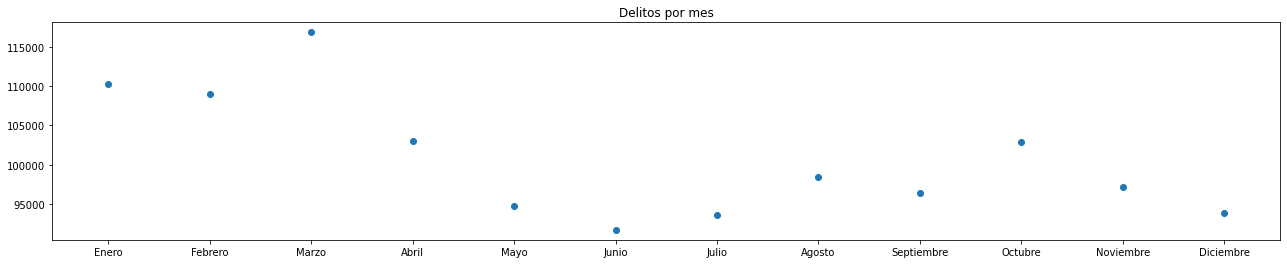

In [32]:
# Grafico solo un delito para verificar que la pendiente es correcta
X = del_x_mes['level_0']
Y = del_x_mes['mes_hechos']
plt.figure(figsize=(22,4))
plt.title("Delitos por mes")
ind = np.arange(len(Y))
plt.scatter(X,Y)
plt.xticks(ind, meses_ordenados)

## 8. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Para poder distinguir cuales son los delitos que caracterizan cada alcaldía, creé un mapa de calor donde visualmente se pueden relacionar las alcaldías con las categorías de los delitos. El rojo representa los valores menores, mientras que el azul los valores mayores. Por ejemplo, para la alcaldía Xochimilco, el delito que la caracteriza es el "Plagio con secuestro" (mayor frecuencia en la alcaldía y menor frecuencia en las demás. A Miguel Hidalgo y GAM las caracteriza el "Robo a cuentahabientes saliendo del cajero con violencia". A las alcaldías Benito Juarez y Álvaro Obregón las caracterizan los feminicidios. Milpa Alta, Magdalena Contrerars y Cuajimalpa de Morelos se caracterizan por ser alcaldías con baja incidenca en todos los tipos de delitos, mientras que Iztapalapa es la alcaldía que presenta alta incidencia en casi todos los tipos de delitos.

![title](img/heat_map.png)

In [33]:
# Filtrar los datos solo para las alcaldías de la CDMX
carp_alcaldias2 = carpetasInv[in_alcaldia]
carp_alcaldias2 = carp_alcaldias2[['alcaldia_hechos','categoria_delito']].reset_index()
carp_alcaldias2.tail()

,index,alcaldia_hechos,categoria_delito
1195896,1208353,ALVARO OBREGON,DELITO DE BAJO IMPACTO
1195897,1208354,BENITO JUAREZ,HECHO NO DELICTIVO
1195898,1208355,BENITO JUAREZ,DELITO DE BAJO IMPACTO
1195899,1208356,CUAUHTEMOC,DELITO DE BAJO IMPACTO
1195900,1208357,COYOACAN,DELITO DE BAJO IMPACTO


In [34]:
# Agrupando los datos 
carp_alcaldias2_grp = carp_alcaldias2.groupby(by=['alcaldia_hechos', 'categoria_delito']).count().reset_index()
carp_alcaldias2_grp.rename(columns={'index':'numero_delitos'},inplace=True)
carp_alcaldias2_grp

,alcaldia_hechos,categoria_delito,numero_delitos
0,ALVARO OBREGON,DELITO DE BAJO IMPACTO,65108
1,ALVARO OBREGON,FEMINICIDIO,1
2,ALVARO OBREGON,HECHO NO DELICTIVO,3567
3,ALVARO OBREGON,HOMICIDIO DOLOSO,474
4,ALVARO OBREGON,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,635
...,...,...,...
252,XOCHIMILCO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,2306
253,XOCHIMILCO,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,5
254,XOCHIMILCO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,3073
255,XOCHIMILCO,SECUESTRO,6


In [35]:
carp_alcaldias2_piv = carp_alcaldias2_grp.pivot(index='alcaldia_hechos',columns='categoria_delito')
carp_alcaldias2_piv = carp_alcaldias2_piv.fillna(0)
carp_alcaldias2_piv

numero_delitos                                 \
categoria_delito       DELITO DE BAJO IMPACTO FEMINICIDIO HECHO NO DELICTIVO   
alcaldia_hechos                                                                
ALVARO OBREGON                        65108.0         1.0             3567.0   
AZCAPOTZALCO                          46599.0         0.0             1883.0   
BENITO JUAREZ                         84329.0         1.0             3985.0   
COYOACAN                              65544.0         0.0             3696.0   
CUAJIMALPA DE MORELOS                 15828.0         0.0              640.0   
CUAUHTEMOC                           149913.0         0.0            11172.0   
GUSTAVO A MADERO                      90963.0         0.0             5571.0   
IZTACALCO                             37495.0         0.0             2469.0   
IZTAPALAPA                           132523.0         0.0             8120.0   
LA MAGDALENA CONTRERAS                16647.0         0.0              807.0   
MIGUEL HIDALGO                        61666.0         0.0             2968.0   
MILPA ALTA                             7158.0         0.0              337.0   
TLAHUAC                               22346.0         0.0             1012.0   
TLALPAN                               58002.0         0.0             2667.0   
VENUSTIANO CARRANZA                   51660.0         0.0             4867.0   
XOCHIMILCO                            29040.0         0.0             1236.0   

                                         \
categoria_delito       HOMICIDIO DOLOSO   
alcaldia_hechos                           
ALVARO OBREGON                    474.0   
AZCAPOTZALCO                      245.0   
BENITO JUAREZ                     123.0   
COYOACAN                          241.0   
CUAJIMALPA DE MORELOS              59.0   
CUAUHTEMOC                        622.0   
GUSTAVO A MADERO                 1078.0   
IZTACALCO                         239.0   
IZTAPALAPA                       1472.0   
LA MAGDALENA CONTRERAS             99.0   
MIGUEL HIDALGO                    263.0   
MILPA ALTA                         72.0   
TLAHUAC                           286.0   
TLALPAN                           491.0   
VENUSTIANO CARRANZA               539.0   
XOCHIMILCO                        259.0   

                                                                      \
categoria_delito       LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO   
alcaldia_hechos                                                        
ALVARO OBREGON                                                 635.0   
AZCAPOTZALCO                                                   278.0   
BENITO JUAREZ                                                  311.0   
COYOACAN                                                       262.0   
CUAJIMALPA DE MORELOS                                           45.0   
CUAUHTEMOC                                                     696.0   
GUSTAVO A MADERO                                              1414.0   
IZTACALCO                                                      285.0   
IZTAPALAPA                                                    1722.0   
LA MAGDALENA CONTRERAS                                          81.0   
MIGUEL HIDALGO                                                 431.0   
MILPA ALTA                                                      40.0   
TLAHUAC                                                        277.0   
TLALPAN                                                        415.0   
VENUSTIANO CARRANZA                                            731.0   
XOCHIMILCO                                                     137.0   

                                           \
categoria_delito       PLAGIO O SECUESTRO   
alcaldia_hechos                             
ALVARO OBREGON                        0.0   
AZCAPOTZALCO                          0.0   
BENITO JUAREZ                         0.0   
COYOACAN                              0.0   
CUAJIMAL

In [36]:
from sklearn import preprocessing 
np_carp_alcadias2_piv = carp_alcaldias2_piv.values
scale = preprocessing.StandardScaler()
np_carp_alcadias2_piv_scaled = scale.fit_transform(np_carp_alcadias2_piv)
carp_alcadias2_piv_scaled = DataFrame(np_carp_alcadias2_piv_scaled)
carp_alcadias2_piv_scaled


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.170150,2.645751,0.045854,0.171959,0.324888,-0.258199,0.897243,0.181978,0.464338,-0.371331,0.854155,-0.431682,0.357163,-0.063667,-0.670422,0.071893,-0.379127,0.385099
1,-0.301184,-0.377964,-0.549567,-0.444536,-0.448346,-0.258199,-0.147143,-0.063110,-0.244406,-0.262505,-0.635141,-0.391767,-0.107773,-0.239444,1.490791,-0.091222,-0.122816,-0.712320
2,0.659615,2.645751,0.193649,-0.772974,-0.376871,-0.258199,-0.368412,0.809402,-0.012473,-0.524275,-0.091986,0.253662,-0.475062,-0.076222,-0.591112,0.164542,-0.379127,-0.533670
3,0.181253,-0.377964,0.091466,-0.455304,-0.483001,-0.258199,-0.217949,-0.014093,-0.330707,-0.086031,-0.232155,-0.372939,-0.445102,-0.178619,-0.452318,0.258497,-0.464564,0.137177
4,-1.084771,-0.377964,-0.989062,-0.945270,-0.953006,-0.258199,-1.023366,-1.180710,-1.199106,-0.721338,-1.143253,-0.518292,-0.772443,-1.100193,-0.690250,-1.124719,-0.720875,-0.974825
5,2.329718,-0.377964,2.734798,0.570393,0.457010,-0.258199,0.056423,1.387810,1.102962,-0.397802,2.185760,3.683399,0.134127,2.108993,-0.234214,-0.101988,0.646117,1.832526
6,0.828550,-0.377964,0.754420,1.797998,2.012142,-0.258199,1.561048,1.485845,1.162294,0.855164,0.696465,-0.147001,0.988544,0.685478,1.292515,1.613983,0.646117,0.899173
7,-0.533018,-0.377964,-0.342372,-0.460689,-0.433185,-0.258199,-0.802098,-0.210163,-0.219595,0.731632,-0.407366,-0.053613,-0.208750,-0.171365,-0.035938,-0.334263,-0.550001,-0.632110
8,1.886880,-0.377964,1.655685,2.858693,2.679246,-0.258199,2.640837,1.250560,2.699523,3.478745,1.642605,-0.202732,3.471903,2.474498,2.759760,2.984475,3.465538,2.678377
9,-1.063915,-0.377964,-0.930015,-0.837585,-0.875033,-0.258199,-0.687038,-1.259138,-1.100939,-0.700749,-1.055648,-0.517539,-0.720290,-1.035184,-0.749733,-0.990312,-0.635438,-0.901907


In [37]:
alcaldias_sorted = sorted(alcaldias)
delitos = carp_alcaldias2['categoria_delito'].unique()
delitos_sorted = sorted(delitos)
print(alcaldias_sorted)
print(delitos_sorted)


['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN', 'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A MADERO', 'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA', 'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO']
['DELITO DE BAJO IMPACTO', 'FEMINICIDIO', 'HECHO NO DELICTIVO', 'HOMICIDIO DOLOSO', 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', 'PLAGIO O SECUESTRO', 'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA', 'ROBO A NEGOCIO CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA', 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA', 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA', 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'SECUESTRO', 'VIOLACIÓN']


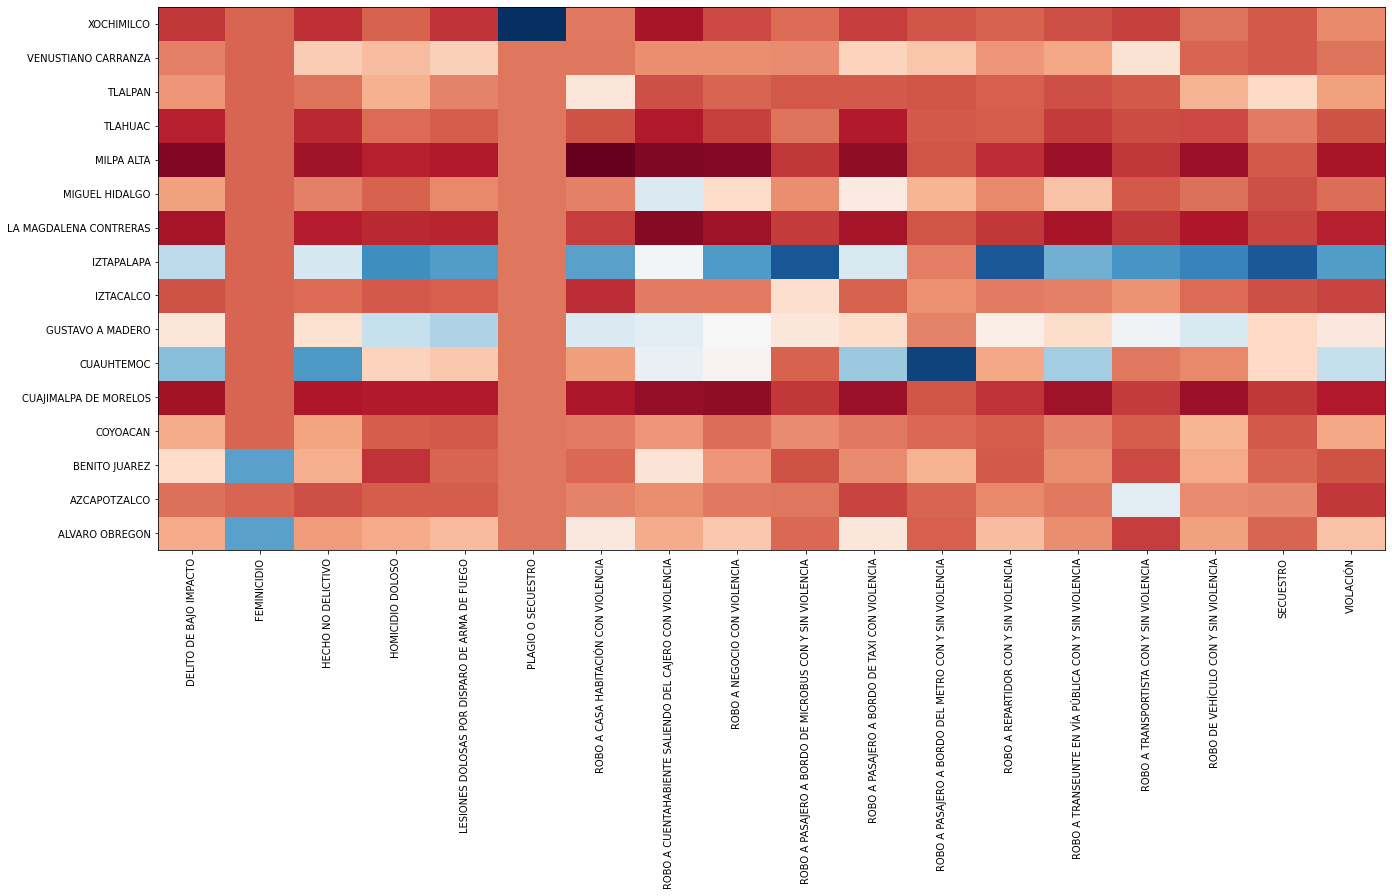

In [38]:
fig, ax = plt.subplots()
im=ax.pcolor(carp_alcadias2_piv_scaled,cmap='RdBu')

#Label Names
row_labels = carp_alcaldias2_piv.columns.levels[1]
col_labels = carp_alcaldias2_piv.index

#move ticks and labels
ax.set_xticks(np.arange(carp_alcaldias2_piv.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(carp_alcaldias2_piv.shape[0])+0.5, minor=False)

#insert labels
ax.set_xticklabels(delitos_sorted, minor=False)
ax.set_yticklabels(alcaldias_sorted, minor=False)

#rotate label
plt.xticks(rotation = 90)

fig.set_size_inches(22,10)
plt.show()



## 9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

In [39]:
# Filtrar los datos solo para los homicidios dolosos
in_homdol = carpetasInv.categoria_delito.isin(['HOMICIDIO DOLOSO'])
carp_homdol = carpetasInv[in_homdol].reset_index(drop=True)
carp_homdol
#carp_alcaldias2 = carp_alcaldias2[['alcaldia_hechos','categoria_delito']].reset_index()
#carp_alcaldias2.tail()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016,Febrero,2016-02-03 19:50:00,2016,Febrero,2016-02-03 21:31:56,HOMICIDIO POR ARMA DE FUEGO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,HOMICIDIO DOLOSO,JESUS CARRANZA,RIVERO,MORELOS,CUAUHTEMOC,NaN,-99.130199,19.448180,NaN
1,2016,Febrero,2016-02-04 07:00:00,2016,Febrero,2016-02-04 21:06:03,HOMICIDIO POR AHORCAMIENTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-7,UI-1CD,HOMICIDIO DOLOSO,2A CERRADA DE CARLOS BOSSIO,NaN,SAN ANDRES TOMATLAN - ZONA URBANA,IZTAPALAPA,NaN,-99.106402,19.330260,NaN
2,2016,Febrero,2016-02-06 04:05:00,2016,Febrero,2016-02-06 04:07:35,HOMICIDIO POR ARMA DE FUEGO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-2CD,HOMICIDIO DOLOSO,JAZMIN,CARRETERA A SANTA CECILIA,PUEBLO NATIVITAS,XOCHIMILCO,NaN,-99.097130,19.231815,NaN
3,2016,Febrero,2016-02-08 10:00:00,2016,Febrero,2016-02-08 12:03:40,HOMICIDIOS INTENCIONALES (OTROS),INVESTIGACIÓN EN TLALPAN,TLP-3,UI-2CD,HOMICIDIO DOLOSO,FERROCARRIL A CUERNAV ACA,(REFERENCIA INSTALACIONES DE GASOLINERIA SIN S...,SAN MIGUEL TOPILEJO,TLALPAN,NaN,-99.144376,19.199835,NaN
4,2016,Febrero,2016-02-09 05:30:00,2016,Febrero,2016-02-09 15:07:57,HOMICIDIO POR ARMA BLANCA,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-1,UI-3CD,HOMICIDIO DOLOSO,FRESNILLO,NaN,5O TRAMO 20 DE NOVIEMBRE,VENUSTIANO CARRANZA,NaN,-99.114122,19.450531,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,2021,Abril,2021-04-29 18:50:00,2021,Abril,2021-04-29 20:16:53,HOMICIDIOS INTENCIONALES (OTROS),FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DEL DELI...,2,1 CON DETENIDO 1 C/D,HOMICIDIO DOLOSO,CANTERAS DEL PEÑON,NaN,EL PARAÍSO,IZTAPALAPA,FUERO COMUN,-99.029013,19.371972,NaN
6971,2021,Abril,2021-04-29 20:15:00,2021,Abril,2021-04-29 20:49:01,FEMINICIDIO POR ARMA BLANCA,FISCALÍA ESPECIALIZADA PARA LA INVESTIGACIÓN D...,C,Unidad de investigación C-2 S/D,HOMICIDIO DOLOSO,POEMA RUSTICO,NaN,INDEPENDENCIA SAN RAMON,LA MAGDALENA CONTRERAS,FUERO COMUN,-99.217276,19.332909,NaN
6972,2021,Abril,2021-04-29 21:00:00,2021,Abril,2021-04-29 22:29:43,HOMICIDIO POR ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DEL DELI...,2,1 CON DETENIDO 1 C/D,HOMICIDIO DOLOSO,HIDALGO,NaN,COLTONGO,AZCAPOTZALCO,FUERO COMUN,-99.154779,19.480972,NaN
6973,2021,Abril,2021-04-30 00:00:00,2021,Abril,2021-04-30 03:59:00,HOMICIDIO POR ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DEL DELI...,2,1 CON DETENIDO 1 C/D,HOMICIDIO DOLOSO,LOPEZ MATEOS,GUADALUPE VICTORIA,TRIUNFO DE LA REPÚBLICA,GUSTAVO A MADERO,FUERO COMUN,-99.109412,19.492196,NaN


In [40]:
for column in carp_homdol.columns.values.tolist():
    print(column)
    print(carp_homdol[column].value_counts(dropna=False))
    print("")

ao_hechos
2018    1537
2019    1516
2020    1252
2017    1216
2016    1027
2021     356
2015      33
2012      10
2014       8
2011       7
2013       7
2010       3
1995       1
2004       1
2000       1
Name: ao_hechos, dtype: int64

mes_hechos
Marzo         706
Abril         660
Enero         625
Mayo          622
Febrero       609
Diciembre     599
Junio         570
Octubre       531
Julio         531
Septiembre    523
Noviembre     509
Agosto        487
NaN             3
Name: mes_hechos, dtype: int64

fecha_hechos
NaT                    3
2018-04-22 03:20:00    2
2019-05-27 23:25:00    2
2019-09-22 23:40:00    2
2016-07-13 14:00:00    2
                      ..
2016-09-04 05:03:00    1
2017-06-27 21:00:00    1
2020-05-05 09:00:00    1
2021-03-05 04:00:00    1
2017-04-08 13:45:00    1
Name: fecha_hechos, Length: 6900, dtype: int64

ao_inicio
2018    1564
2019    1536
2020    1254
2017    1221
2016    1033
2021     367
Name: ao_inicio, dtype: int64

mes_inicio
Marzo         702
Abr

In [41]:
# Filtrar los datos solo para las alcaldías de la CDMX
in_alcaldia = carpetasInv.alcaldia_hechos.isin(alcaldias)
carp_alcaldias = carpetasInv[in_alcaldia]
carp_alcaldias = carp_alcaldias[['alcaldia_hechos','colonia_hechos']].reset_index()
carp_alcaldias.tail()

,index,alcaldia_hechos,colonia_hechos
1195896,1208353,ALVARO OBREGON,CHIMALISTAC
1195897,1208354,BENITO JUAREZ,NAPOLES
1195898,1208355,BENITO JUAREZ,DEL VALLE CENTRO
1195899,1208356,CUAUHTEMOC,ROMA NORTE
1195900,1208357,COYOACAN,EDUCACIÓN


## 9.1. Pinta un mapa con este indicador. Describe los resultados. 

## 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

## 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados).

## 11.1. ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

## 12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las rutas de transporte público donde más ocurren estos delitos  ?